### Digit Classification of MNIST dataset after dimensionality reduction from 784 32 using PCA

##### Validation Accuracy ~ 91%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import theano
from keras.models import Sequential,Model
from keras.layers import Dense,Activation, Dropout
from sklearn.decomposition import PCA
from keras.utils import np_utils

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN 5005)
Using Theano backend.


In [2]:
x = pd.read_csv('./train.csv')
X = np.array(x)
x = X[:,1:]
y = X[:,0]
print x.shape,y.shape

y_train = y[:30000]
y_crossval = y[30000:]
print x.shape,y_train.shape,y_crossval.shape

(42000, 784) (42000,)
(42000, 784) (30000,) (12000,)


In [3]:
#x_train = (x_train - x_train.mean())/x_train.std()
x = (x - x.mean())/x.std()

In [4]:
pca = PCA(n_components=32)

X = pca.fit_transform(x)
#X_crossval = pca.fit_transform(x_crossval)
X_train = X[:30000,:]
X_crossval = X[30000:,:]
Y_train = np_utils.to_categorical(y_train)
Y_crossval = np_utils.to_categorical(y_crossval)
print X_train.shape, X_crossval.shape, Y_train.shape, Y_crossval.shape

(30000, 32) (12000, 32) (30000, 10) (12000, 10)


In [5]:
model = Sequential()

model.add(Dense(16, input_dim=32))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 16)            528         dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 16)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 16)            0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            170         dropout_1[0][0]                  
___________________________________________________________________________________________

In [6]:
hist = model.fit(X_train, Y_train,
                nb_epoch=100,
                shuffle=True,
                batch_size=256,
                validation_data=(X_crossval, Y_crossval))

Train on 30000 samples, validate on 12000 samples
Epoch 1/100
30000/30000 [==============================] - 0s - loss: 3.2418 - acc: 0.2373 - val_loss: 1.5448 - val_acc: 0.5002
Epoch 2/100
30000/30000 [==============================] - 0s - loss: 1.7403 - acc: 0.4552 - val_loss: 0.9936 - val_acc: 0.7087
Epoch 3/100
30000/30000 [==============================] - 0s - loss: 1.2838 - acc: 0.5827 - val_loss: 0.7548 - val_acc: 0.7965
Epoch 4/100
30000/30000 [==============================] - 0s - loss: 1.0693 - acc: 0.6486 - val_loss: 0.6246 - val_acc: 0.8349
Epoch 5/100
30000/30000 [==============================] - 0s - loss: 0.9329 - acc: 0.6918 - val_loss: 0.5440 - val_acc: 0.8572
Epoch 6/100
30000/30000 [==============================] - 0s - loss: 0.8714 - acc: 0.7126 - val_loss: 0.4961 - val_acc: 0.8674
Epoch 7/100
30000/30000 [==============================] - 0s - loss: 0.8251 - acc: 0.7254 - val_loss: 0.4654 - val_acc: 0.8728
Epoch 8/100
30000/30000 [=============================

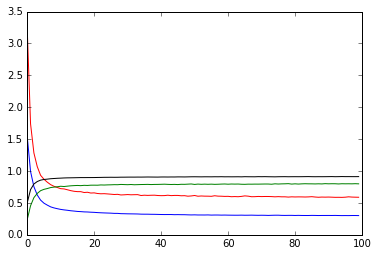

In [7]:
plt.plot(hist.history['val_loss'], color ='b')
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_acc'], color ='black')
plt.plot(hist.history['acc'], color ='g')
plt.show()